<a href="https://colab.research.google.com/github/bclee232/DLwP/blob/master/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# loading the data
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


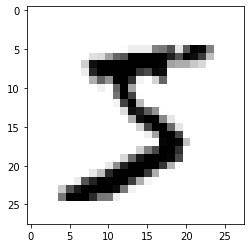

(90, 28, 28)


In [2]:
# tensor slicing
import matplotlib.pyplot as plt

digit = train_images[0]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

tensor_slice = train_images[10:100]
print(tensor_slice.shape)

bot_right_slice = train_images[:, 14:, 14:]
mid_slice = train_images[:, 7:-7, 7:-7]

In [3]:
# network architecture
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

In [4]:
""" preparing the data """

# compilation step - add optimiser, loss function, metrics
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# reshape and scale
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

# categorically encode the labels
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [5]:
# training phase
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 4s 72us/step - loss: 0.2583 - accuracy: 0.9243
Epoch 2/5
60000/60000 [==============================] - 4s 69us/step - loss: 0.1042 - accuracy: 0.9689
Epoch 3/5
60000/60000 [==============================] - 4s 70us/step - loss: 0.0693 - accuracy: 0.9798
Epoch 4/5
60000/60000 [==============================] - 4s 69us/step - loss: 0.0498 - accuracy: 0.9852
Epoch 5/5
60000/60000 [==============================] - 4s 69us/step - loss: 0.0379 - accuracy: 0.9884


In [6]:
# test phase
test_loss, test_acc = network.evaluate(test_images, test_labels)
print(test_loss, test_acc)

10000/10000 [==============================] - 0s 47us/step
0.06694749483759516 0.9789999723434448
